In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time


total_table = []
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}

# Create a session object
session = requests.Session()

# Set headers for the session
session.headers.update(headers)
for page in range(1, 81):
    url = f'https://www.gunviolencearchive.org/mass-shooting?page={page}'
    response = session.get(url, headers=headers)
    print(response)
    if response.status_code == 200:
        print(f"Scraping page {page}...")
        soup = BeautifulSoup(response.text, 'html.parser')
        table = soup.find('table', class_='responsive sticky-enabled')
        if table:
            total_table.append(pd.read_html(str(table))[0])
        else:
            print(f"No table found on page {page}")

for page in range(1, 26):
    url = f'https://www.gunviolencearchive.org/reports/mass-shooting?page={page}&year=2020'
    response = session.get(url, headers=headers)
    print(response)
    if response.status_code == 200:
        print(f"Scraping page {page}...")
        soup = BeautifulSoup(response.text, 'html.parser')
        table = soup.find('table', class_='responsive sticky-enabled')
        if table:
            total_table.append(pd.read_html(str(table))[0])
        else:
            print(f"No table found on page {page}")
for page in range(1, 18):
  url = f'https://www.gunviolencearchive.org/reports/mass-shooting?page={page}&year=2019'
  response = session.get(url, headers=headers)
  print(response)
  if response.status_code == 200:
      print(f"Scraping page {page}...")
      soup = BeautifulSoup(response.text, 'html.parser')
      table = soup.find('table', class_='responsive sticky-enabled')
      if table:
          total_table.append(pd.read_html(str(table))[0])
      else:
          print(f"No table found on page {page}")

for page in range(1, 15):
    url = f'https://www.gunviolencearchive.org/reports/mass-shooting?page={page}&year=2018'
    response = session.get(url, headers=headers)
    if response.status_code == 200:
        print(f"Scraping page {page}...")
        soup = BeautifulSoup(response.text, 'html.parser')
        table = soup.find('table', class_='responsive sticky-enabled')
        if table:
            total_table.append(pd.read_html(str(table))[0])
        else:
            print(f"No table found on page {page}")

df = pd.concat(total_table, ignore_index = True)

<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403

KeyboardInterrupt: 

In [ ]:
df.to_csv('gun_violence_data.csv', index=False)

In [ ]:
import pandas as pd
df = pd.read_csv('gun_violence_data.csv')

In [ ]:
duplicate_values = df['Incident ID'].duplicated()
print(duplicate_values)
df = df.drop_duplicates(subset=['Incident ID'])
df

0       False
1       False
2       False
3       False
4       False
        ...  
4860     True
4861     True
4862     True
4863     True
4864     True
Name: Incident ID, Length: 4865, dtype: bool


,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations
0,2859623,3/22/2024,Louisiana,New Orleans,AP Tureau Ave and N Roman St,2,2,0,0,0,View Incident View Source
1,2855294,3/17/2024,District of Columbia,Washington,1541 7th St NW,2,5,0,0,0,View Incident View Source
2,2854765,3/16/2024,Ohio,Euclid,19500 block of St Clair Ave,0,4,0,0,0,View Incident View Source
3,2854542,3/16/2024,Indiana,Indianapolis,808 Broad Ripple Ave,1,5,0,0,1,View Incident View Source
4,2855051,3/16/2024,Texas,El Paso,2285 Trawood Dr,1,3,0,0,0,View Incident View Source
...,...,...,...,...,...,...,...,...,...,...,...
4588,95550,1/12/2014,Alabama,Huntsville,University Drive,0,5,0,0,0,NaN
4589,95146,1/11/2014,Mississippi,Jackson,3430 W. Capitol Street,0,4,0,0,0,NaN
4590,94514,1/5/2014,Pennsylvania,Erie,829 Parade St,1,3,0,0,0,NaN
4591,92704,1/3/2014,New York,Queens,Farmers Boulevard and 133rd Avenue,1,3,0,0,0,NaN


In [ ]:
duplicate_values = df['Incident ID'].duplicated()
print(duplicate_values)

0       False
1       False
2       False
3       False
4       False
        ...  
4588    False
4589    False
4590    False
4591    False
4592    False
Name: Incident ID, Length: 4593, dtype: bool


In [ ]:
from datetime import datetime
df['Incident Date'] =pd.to_datetime(df['Incident Date'])
df['Incident Date']

0      2024-03-22
1      2024-03-17
2      2024-03-16
3      2024-03-16
4      2024-03-16
          ...    
4588   2014-01-12
4589   2014-01-11
4590   2014-01-05
4591   2014-01-03
4592   2014-01-01
Name: Incident Date, Length: 4593, dtype: datetime64[ns]

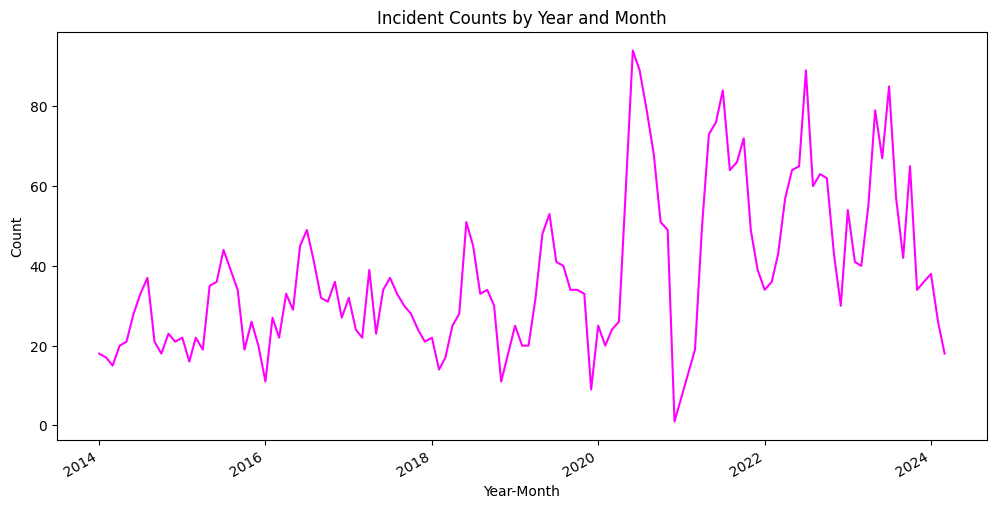

In [ ]:
import matplotlib.pyplot as plt

# Group by year and month, and count the occurrences of 'Incident ID'
monthly_counts = df.groupby(df['Incident Date'].dt.to_period('M'))['Incident ID'].count()

# Set the index to be the year-month periods
monthly_counts.index = monthly_counts.index.to_timestamp()

# Plot the data
monthly_counts.plot(kind='line', figsize=(12, 6), xlabel='Year-Month', ylabel='Count', title='Incident Counts by Year and Month', color='fuchsia')
plt.show()

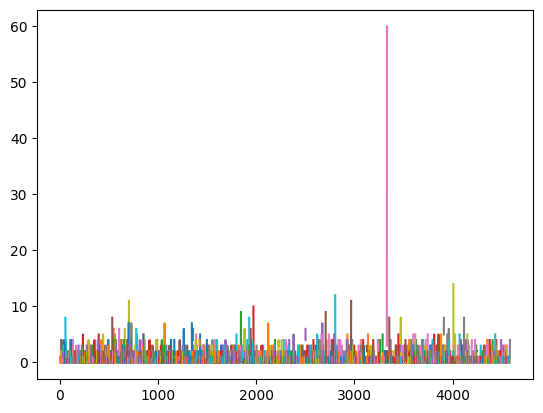

In [ ]:
import matplotlib.pyplot as plt
# Plot the data
df.groupby('Incident Date')['Victims Killed'].plot(kind='line');
plt.show()

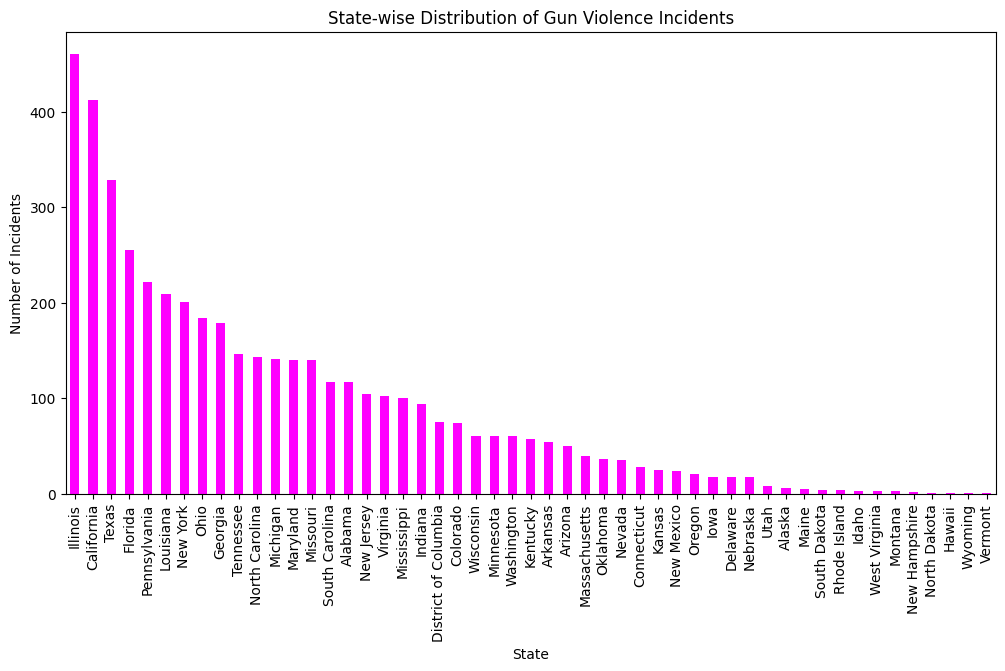

In [ ]:
# Plotting victims killed over time
plt.figure(figsize=(12, 6))
plt.plot(df['Incident Date'], df['Victims Killed'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Victims Killed')
plt.title('Number of Victims Killed over Time')
plt.show()

# Plotting victims injured over time
plt.figure(figsize=(12, 6))
plt.plot(df['Incident Date'], df['Victims Injured'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Victims Injured')
plt.title('Number of Victims Injured over Time')
plt.show()

# Plotting state-wise distribution of incidents
plt.figure(figsize=(12, 6))
df['State'].value_counts().plot(kind='bar', color='Fuchsia')
plt.xlabel('State')
plt.ylabel('Number of Incidents')
plt.title('State-wise Distribution of Gun Violence Incidents')
plt.show()


Best Parameters: (1, 1, 1, 12)
Mean Absolute Error (MAE): 0.3322493190831439
Mean Squared Error (MSE): 0.17597169725572598
Root Mean Squared Error (RMSE): 0.4194898059020338


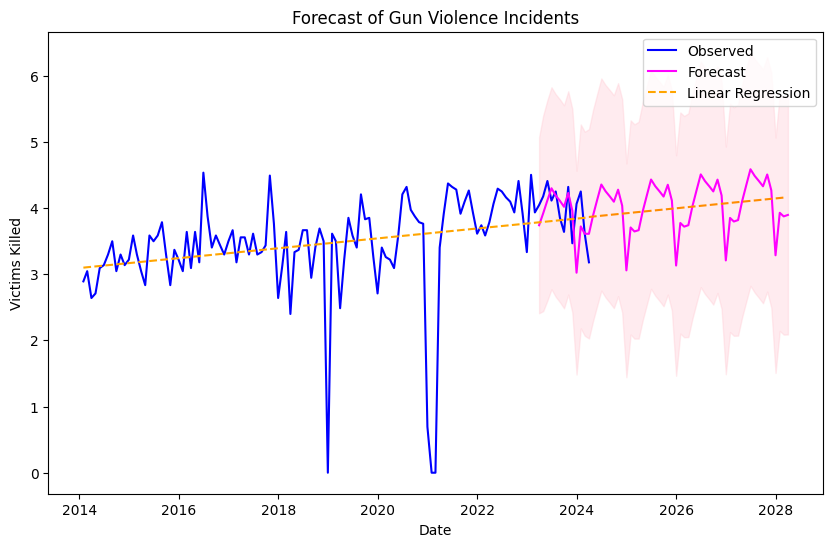

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from itertools import product
import numpy as np
from sklearn.linear_model import LinearRegression

# Aggregate the data by month
monthly_data = df.resample('M', on='Incident Date').sum()

# Apply log transformation to 'Victims Killed' column
monthly_data['Victims Killed'] = np.log1p(monthly_data['Victims Killed'])

# Split data into training and testing sets
train_size = int(len(monthly_data) * 0.9)
train = monthly_data.iloc[:train_size]
test = monthly_data.iloc[train_size:]

# Fit linear regression to the log-transformed data
regression_model = LinearRegression()
regression_model.fit(np.arange(len(train) + len(test)).reshape(-1, 1), monthly_data['Victims Killed'])

# Define the parameter grid for hyperparameter tuning
p = d = q = range(0, 2)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(product(p, d, q))]

# Perform grid search to find the best parameters
best_mae = float('inf')
best_params = None
for param in seasonal_pdq:
    try:
        model = SARIMAX(train['Victims Killed'], order=(1, 1, 1), seasonal_order=param)
        result = model.fit()
        forecast = result.get_forecast(steps=len(test))
        forecast_values = forecast.predicted_mean
        mae = mean_absolute_error(test['Victims Killed'], forecast_values)
        if mae < best_mae:
            best_mae = mae
            best_params = param
    except:
        continue

# Fit SARIMA model using the best parameters
best_model = SARIMAX(train['Victims Killed'], order=(1, 1, 1), seasonal_order=best_params)
result = best_model.fit()

# Forecast for the next four years (48 months)
forecast = result.get_forecast(steps=len(monthly_data) - train_size + 48)

# Get the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Calculate accuracy metrics
mae = mean_absolute_error(test['Victims Killed'], forecast_values[:len(test)])
mse = mean_squared_error(test['Victims Killed'], forecast_values[:len(test)])
rmse = mean_squared_error(test['Victims Killed'], forecast_values[:len(test)], squared=False)

print("Best Parameters:", best_params)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data['Victims Killed'], label='Observed', color="blue")
plt.plot(forecast_values.index, forecast_values, color='fuchsia', label='Forecast')
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)

# Plot linear regression line for the observed and forecasted periods
plt.plot(monthly_data.index, regression_model.predict(np.arange(len(monthly_data)).reshape(-1, 1)), color='orange', linestyle='--', label='Linear Regression')

# Predict values for the forecasted period using the linear regression model
forecast_regression = regression_model.predict(np.arange(len(monthly_data), len(monthly_data) + 48).reshape(-1, 1))
plt.plot(pd.date_range(start=monthly_data.index[-1], periods=48, freq='M'), forecast_regression, color='darkorange', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Victims Killed')
plt.title('Forecast of Gun Violence Incidents')
plt.legend()
plt.show()


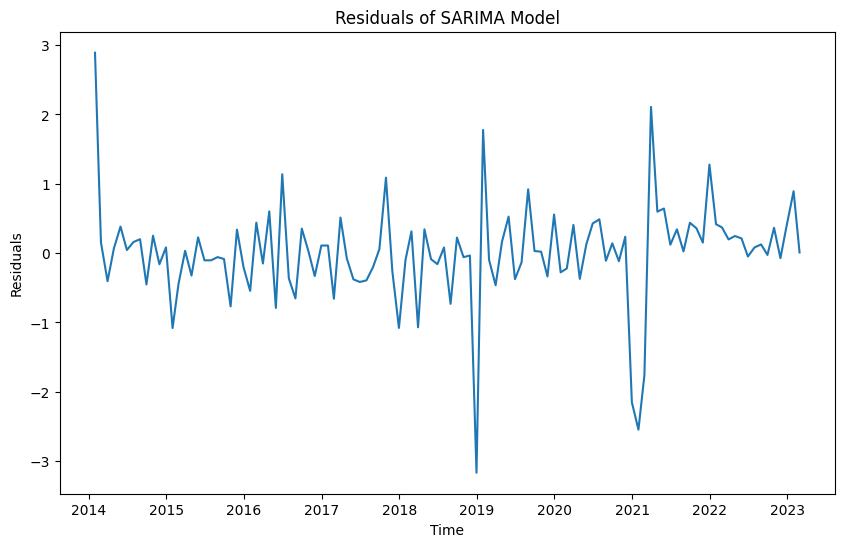

KeyError: 1

In [ ]:
# Obtain residuals
residuals = result.resid

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of SARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

# Perform statistical tests
from statsmodels.stats.diagnostic import acorr_ljungbox

# Ljung-Box test for autocorrelation in residuals
lb_test = acorr_ljungbox(residuals, lags=[20])
print("Ljung-Box test p-values:", lb_test[1])


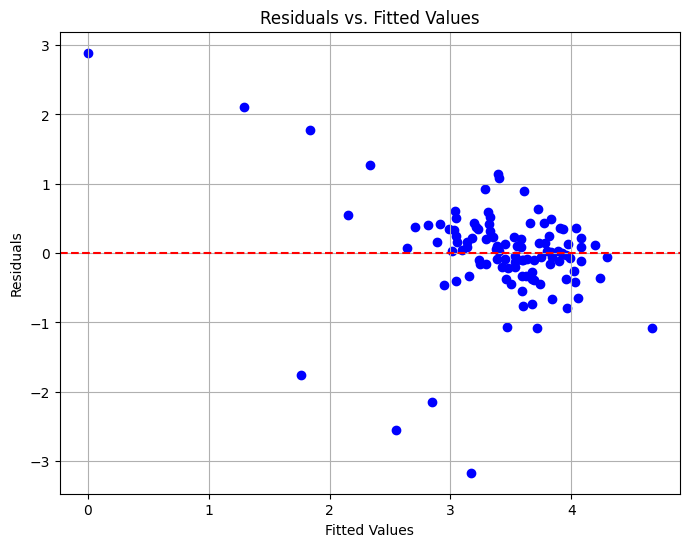

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the residuals and fitted values from the SARIMA model
residuals = result.resid
fitted_values = result.fittedvalues

# Create the residuals vs. fitted values plot
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()
